Exploratory Data Analysis (EDA) on Titanic Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [28]:
df = pd.read_csv('Titanic-Dataset.csv') #making a dataframe from the titanic csv file downloaded from kaggle
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [29]:
print(df.isnull().sum()) #checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [30]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #filling the null values in the age column with the median of the age column
df.drop(columns = 'Cabin', inplace = True) #dropping the cabin column as it has too many null values
df.dropna(inplace = True) #dropping all the rows with null values

1- Comparison between those who survived and those who could not

Survived
0    549
1    340
Name: count, dtype: int64


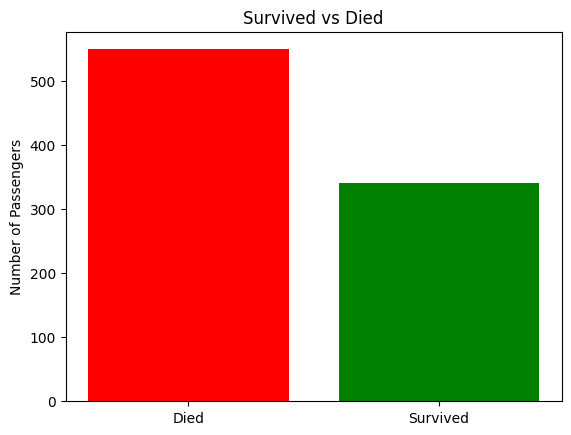

In [31]:
survived = df['Survived'] #storing the survived column in a variable
count = survived.value_counts() #counting the number of survived and dead passengers
print(count) #printing the count of survived and dead passengers
plt.bar(['Died', 'Survived'], count.values, color=['red', 'green'])
plt.title("Survived vs Died")
plt.ylabel("Number of Passengers")
plt.show()

2- Survived by gender

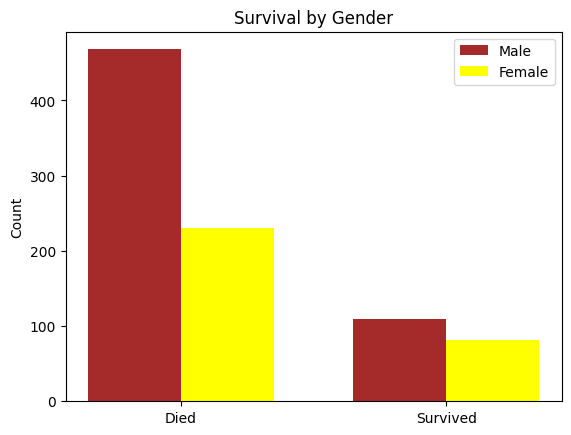

In [32]:
male_survivor = df[df['Sex'] == 'male']['Survived'].value_counts() #counting the number of male survivors
female_survivor = df[df['Sex'] == 'female']['Survived'].value_counts() #counting the number of female survivors
bar_width = 0.35
labels = ['Died', 'Survived']

plt.bar([0, 1], male_survivor.values, width=bar_width, label='Male', color='brown')
plt.bar([x + bar_width for x in [0, 1]], female_survivor.values, width=bar_width, label='Female', color='yellow')

plt.xticks([0 + bar_width / 2, 1 + bar_width / 2], labels)
plt.title("Survival by Gender")
plt.ylabel("Count")
plt.legend()
plt.show()


3- Distribution by age

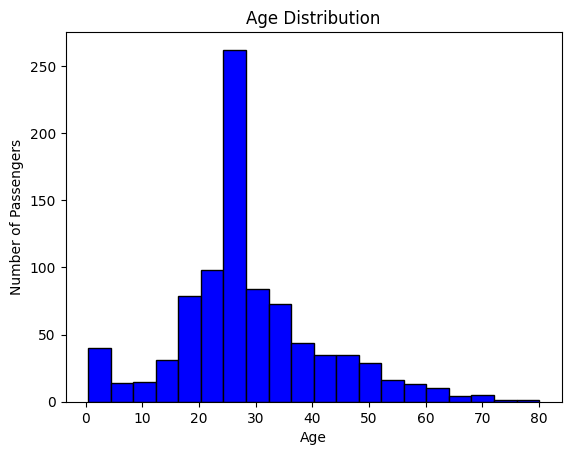

In [33]:
plt.hist(df['Age'], bins=20, color='blue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


4- Passengers

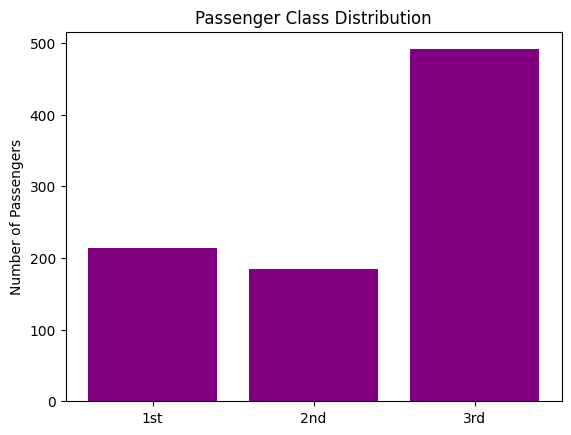

In [34]:
class_counts = df['Pclass'].value_counts().sort_index()
plt.bar(['1st', '2nd', '3rd'], class_counts.values, color='purple')
plt.title("Passenger Class Distribution")
plt.ylabel("Number of Passengers")
plt.show()


5- Fares

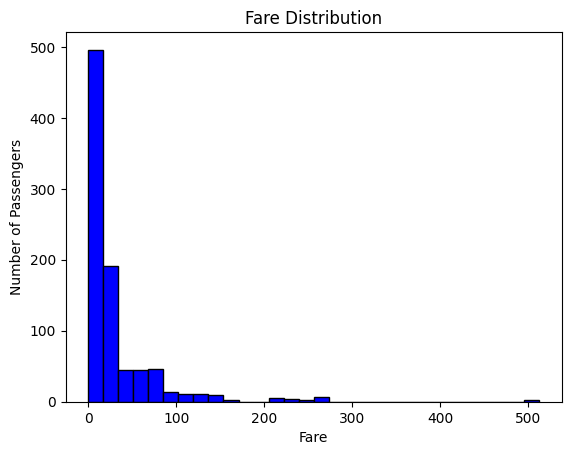

In [35]:
plt.hist(df['Fare'], bins=30, color= 'blue', edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()


6- Survivors Age

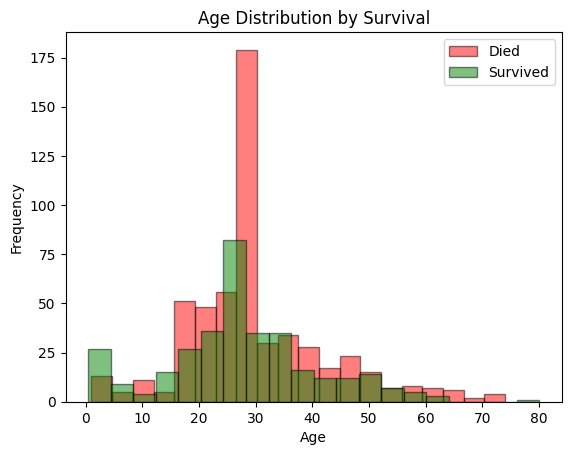

In [37]:
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Died', color='red', edgecolor='black')
plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()
